### LDA(Linear Discriminant Analysis)
* 선형 판별 분석법이라 불리며, PCA와 매우 유사함
* PCA와 다른 점은, LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함
* 즉, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음

##### LDA 스텝
1. 클래스 내부와 클래스 간 분산 행렬을 구함. 이 두개의 행렬은 입력 데이터의 결정값 클래스별로 개별 피처의 평균 벡터를 기반으로 함
2. 클래스 내부 분산 행렬을 $S_W$, 클래스 간 분산 행렬을 $S_U$라고 하고, $S^T_WS_B$의 식을 이용하여 두 행렬을 고유벡터로 분해할 수 있음
3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출함
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함

### 붓꽃 데이터 셋에 LDA 적용하기 

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


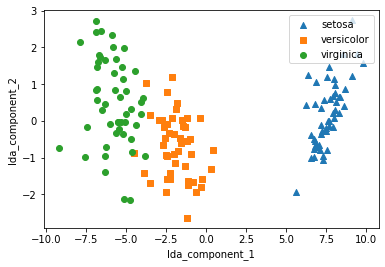

<Figure size 432x288 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
fig1 = plt.gcf()
plt.show()
plt.draw()